## Notebook zur quantifizierenden Exploration der Amtspresse Preußen


Einleseroutine

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df = pd.read_csv(r'./meta_data/200523-metadaten-amtspresse.csv', parse_dates=['full_date']) 
df.article_counts_per_issue = df.article_counts_per_issue.astype('category')

grundlegende Erkundungen

In [8]:
df.shape # Anzahl der Zeilen, Spalten

(29142, 11)

In [3]:
df.head() # Anfang des DataFrames

,filename,full_date,year,year_month,article_count,article_counts_per_issue,article_length_chars,article_length_words,newspaper,headline,article_text
0,1863-07-01_01.txt,1863-07-01,1863,1863-07,1,9,7101,955,PC,Ist das Abgeordnetenhaus eine Obrigkeit?,Ist das Abgeordnetenhaus eine Obrigkeit?\nEin ...
1,1863-07-01_02.txt,1863-07-01,1863,1863-07,2,9,1083,129,PC,Wochenschau.,Wochenschau.\nDie Nachrichten aus Karlsbad übe...
2,1863-07-01_03.txt,1863-07-01,1863,1863-07,3,9,546,66,PC,Wochenschau.,Ihre Majestät die Königin Augusta verweilt noc...
3,1863-07-01_04.txt,1863-07-01,1863,1863-07,4,9,2145,310,PC,Wochenschau.,Se. Königl. Hoheit der Kronprinz hat von Litth...
4,1863-07-01_05.txt,1863-07-01,1863,1863-07,5,9,1904,260,PC,Wochenschau.,Es muß der Regierung zu großer Befriedigung ge...


In [4]:
df.tail() # Ende des DataFrames

,filename,full_date,year,year_month,article_count,article_counts_per_issue,article_length_chars,article_length_words,newspaper,headline,article_text
29137,1894-12-07_09.txt,1894-12-07,1894,1894-12,29138,16,6091,725,NM,Aus dem Auslande.,Aus dem Auslande.\nIn Oesterreich\nsteht die F...
29138,1894-12-07_10.txt,1894-12-07,1894,1894-12,29139,16,3509,580,NM,Der Reichshaushaltsetat für 1895/96.,Der Reichshaushaltsetat für 1895/96.\nDer Entw...
29139,1894-12-07_11.txt,1894-12-07,1894,1894-12,29140,16,264,29,NM,Von der Cholera.,Von der Cholera.\nVom 26. November bis 3. Deze...
29140,1894-12-07_12.txt,1894-12-07,1894,1894-12,29141,16,2995,455,NM,Die Influenza in Preußen 1889 bis 1891.,Die Influenza in Preußen 1889 bis 1891.\nDas A...
29141,1894-12-07_13.txt,1894-12-07,1894,1894-12,29142,16,5035,626,NM,Aus dem Inlande.,Aus dem Inlande.\nUnser Kaiser\nbat am 3. Deze...


In [5]:
df.describe() # 8-Werte-Zusammenfasssung der Spalten mit numerischen Daten

,year,article_count,article_length_chars,article_length_words
count,29142.000000,29142.000000,29142.000000,29142.000000
mean,1883.323485,14571.500000,3126.136470,407.063860
std,7.941741,8412.715109,3394.087335,457.844182
min,1863.000000,1.000000,52.000000,5.000000
25%,1880.000000,7286.250000,770.000000,92.000000
50%,1885.000000,14571.500000,1978.000000,255.000000
75%,1889.000000,21856.750000,4624.000000,610.000000
max,1894.000000,29142.000000,92852.000000,13916.000000


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29142 entries, 0 to 29141
Data columns (total 11 columns):
filename                    29142 non-null object
full_date                   29142 non-null datetime64[ns]
year                        29142 non-null int64
year_month                  29142 non-null object
article_count               29142 non-null int64
article_counts_per_issue    29142 non-null category
article_length_chars        29142 non-null int64
article_length_words        29142 non-null int64
newspaper                   29142 non-null category
headline                    29142 non-null object
article_text                29138 non-null object
dtypes: category(2), datetime64[ns](1), int64(4), object(4)
memory usage: 2.1+ MB


In [7]:
df.isna().sum() # Suche nach NaN-Werten

filename                    0
full_date                   0
year                        0
year_month                  0
article_count               0
article_counts_per_issue    0
article_length_chars        0
article_length_words        0
newspaper                   0
headline                    0
article_text                4
dtype: int64

In [10]:
mask_nan = df.loc[:, 'article_text'].isna()
df.loc[mask_nan, :]  # Anzeigen der Zeilen mit NaN-Werten mit Hilfe einer boolschen Maskierung.

,filename,full_date,year,year_month,article_count,article_counts_per_issue,article_length_chars,article_length_words,newspaper,headline,article_text
1594,1867-03-20_04.txt,1867-03-20,1867,1867-03,1595,12,3441,453,PC,Nord-Schleswig.,NaN
6069,1877-09-19_03.txt,1877-09-19,1877,1877-09,6070,6,527,67,PC,Unser Kaiser,NaN
16963,1886-12-28_02.txt,1886-12-28,1886,1886-12,16964,30,6916,937,NM,Deutschland im Jahre 1886.,NaN
21014,1888-09-14_12.txt,1888-09-14,1888,1888-09,21015,25,2549,335,NM,Vom Hofe.,NaN


In [13]:
df.loc[:, 'newspaper'].unique() # Anzeigen der eindeutigen Werte in einer kategorischen Spalte

[PC, NM]
Categories (2, object): [PC, NM]

In [14]:
df.article_length_words.idxmax() # Ausgabe des Index des Maximums in einer Spalte

8021

In [15]:
df.iloc[8021,:] # Anzeigen der Zeile via Index des Maximums in der zuvor abgefragten Spalte

filename                                                    1882-06-21_03.txt
full_date                                                 1882-06-21 00:00:00
year                                                                     1882
year_month                                                            1882-06
article_count                                                            8022
article_counts_per_issue                                                    7
article_length_chars                                                    92852
article_length_words                                                    13916
newspaper                                                                  PC
headline                             Rede des Reichskanzlers Fürsten Bismarck
article_text                Rede des Reichskanzlers Fürsten Bismarck in de...
Name: 8021, dtype: object

In [16]:
df.article_length_words.idxmin() # Ausgabe des Index des Minimums in einer Spalte

4077

In [17]:
df.iloc[4077,:] # Anzeigen der Zeile via Index des Minimums in der zuvor abgefragten Spalte

filename                                           1872-10-16_06.txt
full_date                                        1872-10-16 00:00:00
year                                                            1872
year_month                                                   1872-10
article_count                                                   4078
article_counts_per_issue                                           7
article_length_chars                                              67
article_length_words                                               5
newspaper                                                         PC
headline                    Eine Denkschrift der deutschen Bischöfe.
article_text                Eine Denkschrift der deutschen Bischöfe.
Name: 4077, dtype: object

In [20]:
df_worte = df.groupby(df.article_length_words.eq(20)) # Gruppieren nach Spalte Wörter pro Artikel mit der Bedinungen der Wortanzahl gleich 20

In [21]:
df_worte.head()

,filename,full_date,year,year_month,article_count,article_counts_per_issue,article_length_chars,article_length_words,newspaper,headline,article_text
0,1863-07-01_01.txt,1863-07-01,1863,1863-07,1,9,7101,955,PC,Ist das Abgeordnetenhaus eine Obrigkeit?,Ist das Abgeordnetenhaus eine Obrigkeit?\nEin ...
1,1863-07-01_02.txt,1863-07-01,1863,1863-07,2,9,1083,129,PC,Wochenschau.,Wochenschau.\nDie Nachrichten aus Karlsbad übe...
2,1863-07-01_03.txt,1863-07-01,1863,1863-07,3,9,546,66,PC,Wochenschau.,Ihre Majestät die Königin Augusta verweilt noc...
3,1863-07-01_04.txt,1863-07-01,1863,1863-07,4,9,2145,310,PC,Wochenschau.,Se. Königl. Hoheit der Kronprinz hat von Litth...
4,1863-07-01_05.txt,1863-07-01,1863,1863-07,5,9,1904,260,PC,Wochenschau.,Es muß der Regierung zu großer Befriedigung ge...
452,1864-07-13_06.txt,1864-07-13,1864,1864-07,453,8,148,20,PC,Ohne Überschrift,Die Königin Augusta weilt bereits seit acht Ta...
734,1865-03-22_08.txt,1865-03-22,1865,1865-03,735,11,183,20,PC,Ohne Überschrift,Das Kronprinzliche hohe Paar ist aus Stettin n...
775,1865-04-26_08.txt,1865-04-26,1865,1865-04,776,8,210,20,PC,Ohne Überschrift,Die Grenzregulirung zwischen Schleswig und Jüt...
808,1865-05-31_04.txt,1865-05-31,1865,1865-05,809,9,159,20,PC,Ohne Überschrift,In den Zeitungen ist von einer bevorstehenden ...
2272,1868-09-23_09.txt,1868-09-23,1868,1868-09,2273,9,178,20,PC,In Spanien,"In Spanien ist ein Aufstand ausgebrochen, dess..."


In [14]:
df.article_counts_per_issue.idxmax()

18953

In [15]:
df.loc[18953,:]

filename                            1887-11-04_01.txt
full_date                         1887-11-04 00:00:00
year                                             1864
year_month                                    1864-02
article_count                                   18954
article_counts_per_issue                           37
article_length_chars                             5526
article_length_words                              766
newspaper                                          NM
headline                    Unzeitgemäße Forderungen.
Name: 18953, dtype: object

In [16]:
df.article_length_words.gt(10).value_counts() # zählen, wie viele Artikel mehr als 10 Wörter umfassen

True     28833
False      309
Name: article_length_words, dtype: int64

## Abfrage in der Spalte Headline mit boolscher Maskierung und erstellen eines neuen DataFrames bzw. Series

In [56]:
mask_headline = df.loc[:, 'headline'] == 'Politische Wochenschau.'
df_headline_politische_wochenschau = df.loc[mask_headline, :]

print(df_headline_politische_wochenschau.head())

df_headline_politische_wochenschau_filename = df_headline_politische_wochenschau.loc[:, 'filename']
print(df_headline_politische_wochenschau_filename.shape)

# folgen Zeile speichert die Series in einer csv-Datei
# df_headline_politische_wochenschau_filename.to_csv('200524-headline-politische-wochenschau-filename.csv')

df_headline_politische_wochenschau.describe()

(798,)


,year,article_count,article_length_chars,article_length_words
count,798.000000,798.000000,798.000000,798.000000
mean,1886.610276,17006.879699,7359.007519,930.497494
std,3.449910,5914.285660,2762.320171,351.754308
min,1882.000000,9222.000000,2631.000000,338.000000
25%,1884.000000,12185.250000,4826.000000,608.000000
50%,1885.000000,14418.500000,7284.500000,928.000000
75%,1889.000000,22653.250000,9595.750000,1198.500000
max,1894.000000,29137.000000,16091.000000,2013.000000


## erste Plots: Anzahl der Wort pro Artikel

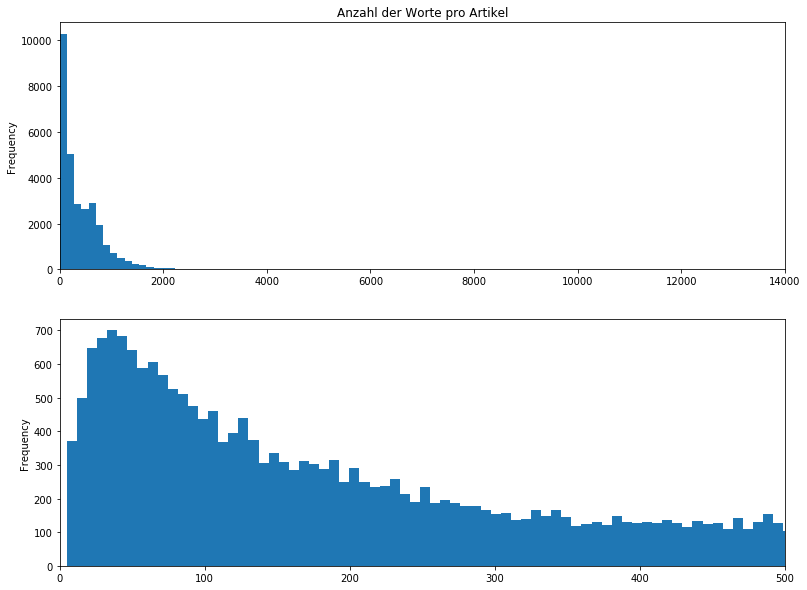

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(13,10))

df.article_length_words.plot(kind='hist', # Histogramm plotten
                             ax=ax[0],
                             title='Anzahl der Worte pro Artikel',
                             bins=100, # Anzahl der bins
                             xlim=[0,14000])  # Grenzen der x-Achse

df.article_length_words.plot(kind='hist',
                             ax=ax[1],
                             bins=2000,
                             xlim=[0,500])
                             

## Plots zu den kategorischen Spalten newspaper und article_counts_per_issue

In [18]:
df.newspaper.unique()

[PC, NM]
Categories (2, object): [PC, NM]

In [20]:
df.article_counts_per_issue.unique()

[9, 7, 8, 5, 6, ..., 29, 36, 37, 34, 32]
Length: 33
Categories (33, int64): [9, 7, 8, 5, ..., 36, 37, 34, 32]

In [21]:
pd.crosstab(index=df.article_counts_per_issue, columns='Count')

col_0,Count
article_counts_per_issue,
3,30
4,276
5,553
6,1121
7,1317
8,1500
9,1539
10,1315
11,1432


In [22]:
pd.crosstab(index=df.article_counts_per_issue, columns=df.newspaper, normalize='columns') # Daten werden normalisiert

newspaper,NM,PC
article_counts_per_issue,,
3,0.000000,0.003442
4,0.000588,0.030286
5,0.000979,0.061145
6,0.002350,0.123093
7,0.005728,0.137662
8,0.008127,0.153034
9,0.018066,0.134220
10,0.025263,0.091660
11,0.038042,0.075141


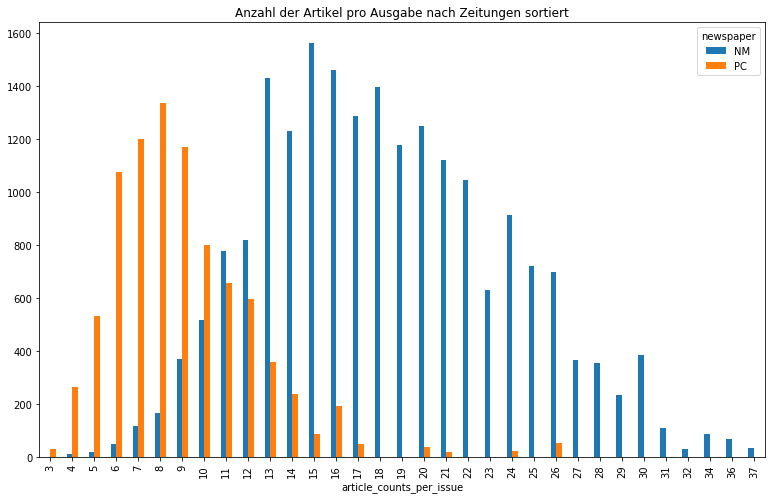

In [23]:
var_cross_tab = pd.crosstab(index=df.article_counts_per_issue, columns=df.newspaper)

var_cross_tab.plot(kind='bar',
                  figsize=(13,8),
                  title='Anzahl der Artikel pro Ausgabe nach Zeitungen sortiert'
                  )

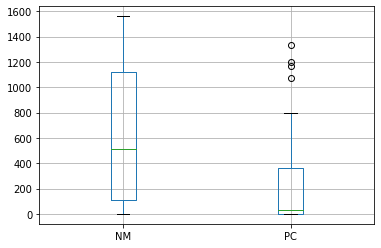

In [24]:
var_cross_tab.boxplot() # title='Verteilung der Lagemaße nach Anzahl der Artikel pro Ausgabe')

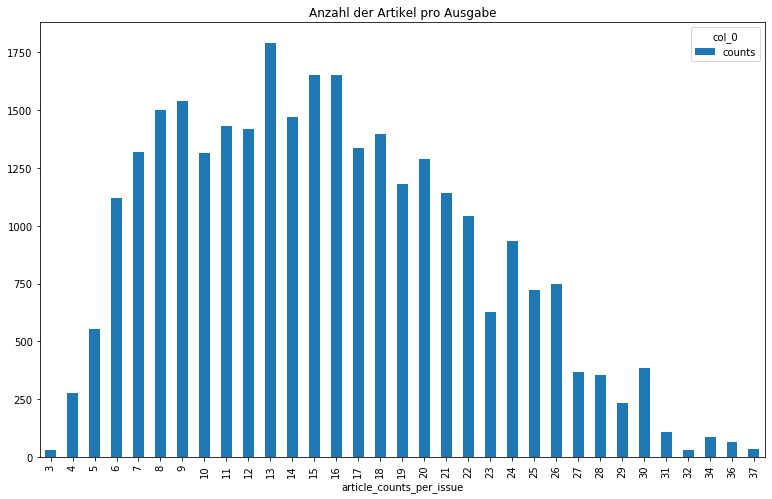

In [25]:
var_cross_tab_2 = pd.crosstab(index=df.article_counts_per_issue, columns='counts')

var_cross_tab_2.plot(kind='bar',
                  figsize=(13,8),
                  title='Anzahl der Artikel pro Ausgabe',
                  )

## Anzahl der gesamten Artikel pro Zeitung

In [27]:
pd.crosstab(index=df.newspaper, columns='count')

col_0,count
newspaper,
NM,20425
PC,8717


## Boxplots zu den Daten

In [28]:
df.columns

Index(['filename', 'full_date', 'year', 'year_month', 'article_count',
       'article_counts_per_issue', 'article_length_chars',
       'article_length_words', 'newspaper', 'headline'],
      dtype='object')

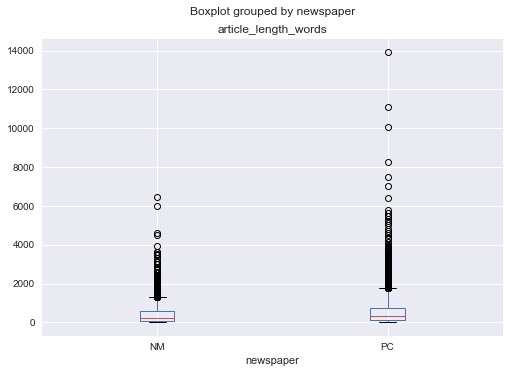

In [29]:
plt.style.use('seaborn')

fig, ax = plt.subplots()
df.boxplot(column='article_length_words', by='newspaper', ax=ax)

## Scatter Matrix zur Feststellung von Korrelation der numerischen Spalten

C:\Users\Martin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 1864.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\Martin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 1864.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Martin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1864.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026536CB3848>,
      dtype=object)

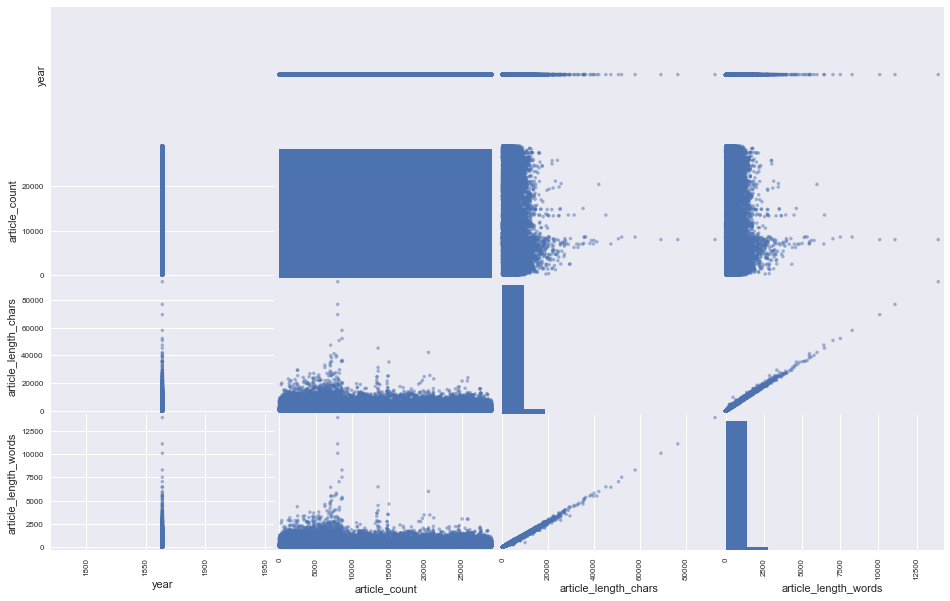

In [30]:
pd.plotting.scatter_matrix(df, figsize=[16, 10])

In [16]:
import seaborn as sns

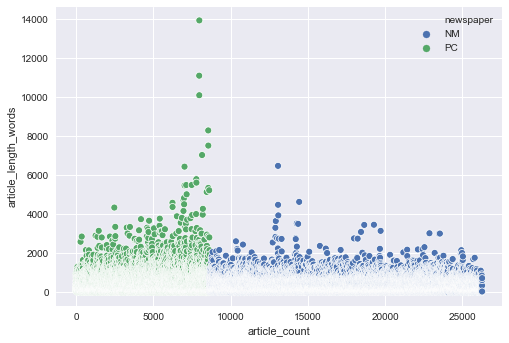

In [17]:
fig, ax = plt.subplots()
# in Beziehung sind: erster bis letzter Artikel und länge der Artikel in Wörtern
sns.scatterplot(x='article_count', y='article_length_words', data=df, ax=ax , hue='newspaper')

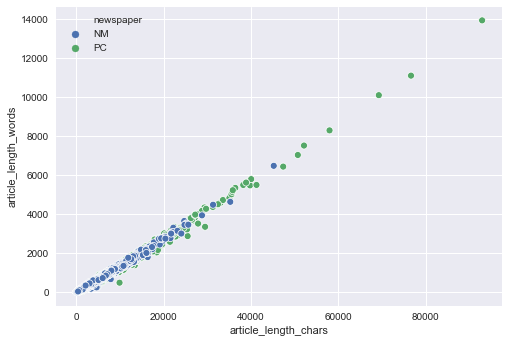

In [18]:
fig, ax = plt.subplots()
# in Beziehung sind: Länge in Buchstaben und Länge in Wörtern: Korrelation ist offensichtlich, Daten damit nicht brauchbar/aussagekräftig
sns.scatterplot(x='article_length_chars', y='article_length_words', data=df, ax=ax , hue='newspaper')

## Plotten mit Seaborn

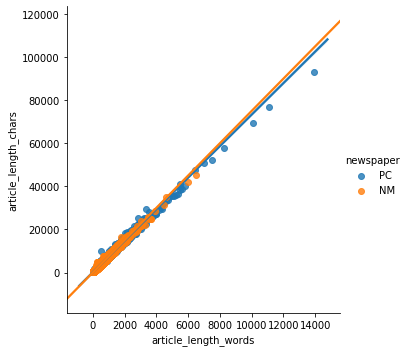

In [8]:
sns.lmplot(x='article_length_words', y='article_length_chars',  hue='newspaper', data=df) # Daten liegen auf einer Geraden - damit nicht aussagekräftig

## Durchschnittliche Längen der Artikel nach Monaten berechnet

year_month
1863-07    326.081081
1863-08    322.187500
1863-09    406.181818
1863-10    337.466667
1863-11    288.636364
              ...    
1894-08    335.911243
1894-09    350.087591
1894-10    268.454082
1894-11    248.958549
1894-12    385.966667
Name: article_length_words, Length: 366, dtype: float64
(366,)


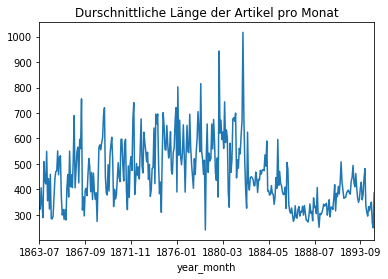

In [44]:
df_mean_per_month = df.groupby('year_month')['article_length_words'].mean()
print(df_mean_per_month)
print(df_mean_per_month.shape)
df_mean_per_month.plot(title='Durschnittliche Länge der Artikel pro Monat');

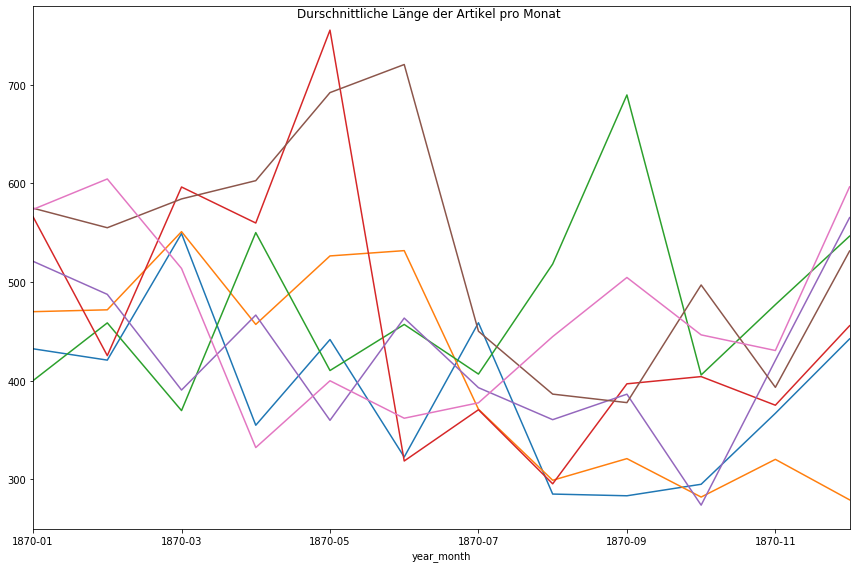

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

plt.suptitle('Durschnittliche Länge der Artikel pro Monat')

df_mean_per_month[6:18].plot(ax=ax)
df_mean_per_month[18:30].plot(ax=ax)
df_mean_per_month[30:42].plot(ax=ax)
df_mean_per_month[42:54].plot(ax=ax)
df_mean_per_month[54:66].plot(ax=ax)
df_mean_per_month[66:78].plot(ax=ax)
df_mean_per_month[78:90].plot(ax=ax)


plt.tight_layout()

